In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)
neo.drugs(False)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(True)


# get a direct reference to the mob model
cpr = models["Resuscitation"]

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.1 sec. Average model step in 0.0259 ms.


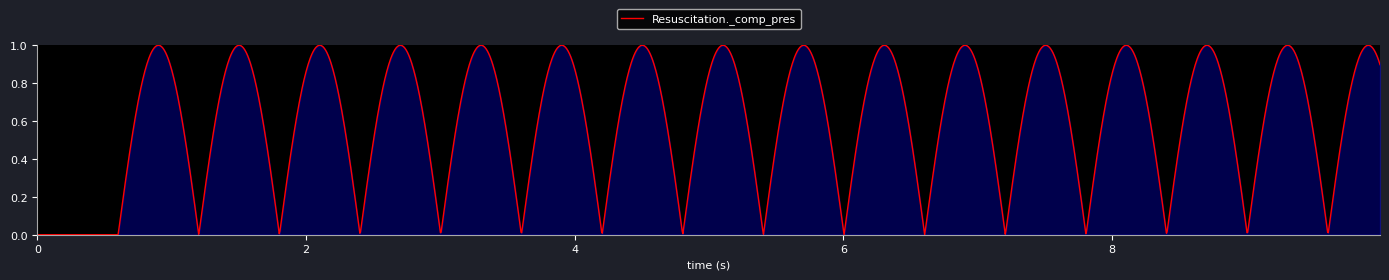


Resuscitation._comp_pres: max        1.0 min        0.0


In [2]:
cpr.start_cpr()
neo.plot_time_graph(["Resuscitation._comp_pres"], time_to_calculate=10.0)